# 第4章 ディープニューラルネットワーク

https://github.com/yusugomori/deeplearning-tensorflow-keras

- 本の内容：単純なニューラルネットではXORが解けなかった。層を増やすことでXORが解けた。

### mnistデータセット＝手書き文字データセット

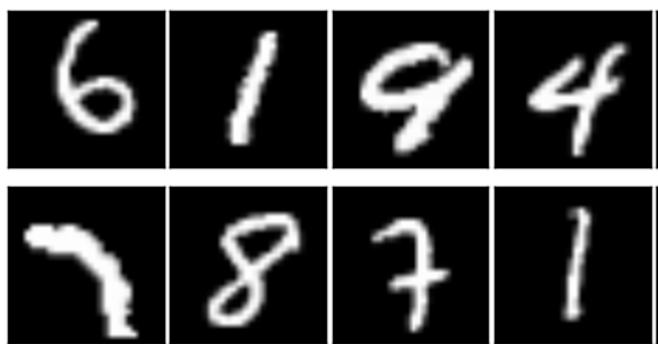

### 早速kerasで手書き文字の分類をしてみる

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(0)

'''
データの生成
'''
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # MNISTの一部を使う
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

'''
モデル設定
'''
n_in = len(X[0])  # 784
n_hidden = 200
n_out = len(Y[0])  # 10

model = Sequential()
model.add(Dense(n_hidden, input_dim=n_in))
model.add(Activation('tanh'))

model.add(Dense(n_hidden))
model.add(Activation('tanh'))

model.add(Dense(n_hidden))
model.add(Activation('tanh'))

model.add(Dense(n_hidden))
model.add(Activation('tanh'))

model.add(Dense(n_out))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

'''
モデル学習
'''
epochs = 100
batch_size = 200

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)

'''
予測精度の評価
'''
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

Using TensorFlow backend.


Epoch 1/100
8000/8000 [==============================] - 0s - loss: 1.7995 - acc: 0.4204     
Epoch 2/100
8000/8000 [==============================] - 0s - loss: 1.1209 - acc: 0.7209     
Epoch 3/100
8000/8000 [==============================] - 0s - loss: 0.8397 - acc: 0.7960     
Epoch 4/100
8000/8000 [==============================] - 0s - loss: 0.6968 - acc: 0.8270     
Epoch 5/100
8000/8000 [==============================] - 0s - loss: 0.5990 - acc: 0.8485     
Epoch 6/100
8000/8000 [==============================] - 0s - loss: 0.5303 - acc: 0.8640     
Epoch 7/100
8000/8000 [==============================] - 0s - loss: 0.4900 - acc: 0.8726     
Epoch 8/100
8000/8000 [==============================] - 0s - loss: 0.4482 - acc: 0.8855     
Epoch 9/100
8000/8000 [==============================] - 0s - loss: 0.4271 - acc: 0.8871     
Epoch 10/100
8000/8000 [==============================] - 0s - loss: 0.4019 - acc: 0.8929     
Epoch 11/100
8000/8000 [==============================] - 0

8000/8000 [==============================] - 0s - loss: 0.0327 - acc: 0.9948     
Epoch 88/100
8000/8000 [==============================] - 0s - loss: 0.0321 - acc: 0.9946     
Epoch 89/100
8000/8000 [==============================] - 0s - loss: 0.0322 - acc: 0.9948     
Epoch 90/100
8000/8000 [==============================] - 0s - loss: 0.0316 - acc: 0.9949     
Epoch 91/100
8000/8000 [==============================] - 0s - loss: 0.0310 - acc: 0.9951     
Epoch 92/100
8000/8000 [==============================] - 0s - loss: 0.0304 - acc: 0.9953     
Epoch 93/100
8000/8000 [==============================] - 0s - loss: 0.0300 - acc: 0.9953     
Epoch 94/100
8000/8000 [==============================] - 0s - loss: 0.0296 - acc: 0.9951     
Epoch 95/100
8000/8000 [==============================] - 0s - loss: 0.0291 - acc: 0.9954     
Epoch 96/100
8000/8000 [==============================] - 0s - loss: 0.0290 - acc: 0.9954     
Epoch 97/100
8000/8000 [==============================] - 0s - 

### tensorflowでもflowしておく。

In [2]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)
tf.set_random_seed(123)

'''
データの生成
'''
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # MNISTの一部を使う
train_size = 0.8
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, train_size=train_size)

'''
モデル設定
'''
n_in = len(X[0])  # 784
n_hidden = 200
n_out = len(Y[0])  # 10

x = tf.placeholder(tf.float32, shape=[None, n_in])
t = tf.placeholder(tf.float32, shape=[None, n_out])

# 入力層 - 隠れ層
W0 = tf.Variable(tf.truncated_normal([n_in, n_hidden], stddev=0.1))
b0 = tf.Variable(tf.zeros([n_hidden]))
h0 = tf.nn.tanh(tf.matmul(x, W0) + b0)

# 隠れ層 - 隠れ層
W1 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.1))
b1 = tf.Variable(tf.zeros([n_hidden]))
h1 = tf.nn.tanh(tf.matmul(h0, W1) + b1)

W2 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.1))
b2 = tf.Variable(tf.zeros([n_hidden]))
h2 = tf.nn.tanh(tf.matmul(h1, W2) + b2)

W3 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.1))
b3 = tf.Variable(tf.zeros([n_hidden]))
h3 = tf.nn.tanh(tf.matmul(h2, W3) + b3)

# 隠れ層 - 出力層
W4 = tf.Variable(tf.truncated_normal([n_hidden, n_out], stddev=0.1))
b4 = tf.Variable(tf.zeros([n_out]))
y = tf.nn.softmax(tf.matmul(h3, W4) + b4)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y),
                               reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

'''
モデル学習
'''
epochs = 100
batch_size = 200

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

n_batches = (int)(N * train_size) // batch_size

for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end],
        })

    # 訓練データに対する学習の進み具合を出力
    loss = cross_entropy.eval(session=sess, feed_dict={
        x: X_,
        t: Y_
    })
    acc = accuracy.eval(session=sess, feed_dict={
        x: X_,
        t: Y_
    })
    print('epoch:', epoch, ' loss:', loss, ' accuracy:', acc)

'''
予測精度の評価
'''
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})
print('accuracy: ', accuracy_rate)

epoch: 0  loss: 1.67032  accuracy: 0.4875
epoch: 1  loss: 1.23551  accuracy: 0.671625
epoch: 2  loss: 0.991614  accuracy: 0.75175
epoch: 3  loss: 0.835793  accuracy: 0.79375
epoch: 4  loss: 0.729122  accuracy: 0.808875
epoch: 5  loss: 0.655625  accuracy: 0.82725
epoch: 6  loss: 0.600419  accuracy: 0.84425
epoch: 7  loss: 0.55136  accuracy: 0.857625
epoch: 8  loss: 0.520616  accuracy: 0.86225
epoch: 9  loss: 0.488297  accuracy: 0.867
epoch: 10  loss: 0.464243  accuracy: 0.874625
epoch: 11  loss: 0.437478  accuracy: 0.883
epoch: 12  loss: 0.417477  accuracy: 0.8875
epoch: 13  loss: 0.40248  accuracy: 0.8875
epoch: 14  loss: 0.384791  accuracy: 0.894875
epoch: 15  loss: 0.372133  accuracy: 0.897
epoch: 16  loss: 0.353012  accuracy: 0.903375
epoch: 17  loss: 0.346782  accuracy: 0.900625
epoch: 18  loss: 0.331281  accuracy: 0.908375
epoch: 19  loss: 0.323234  accuracy: 0.907875
epoch: 20  loss: 0.312817  accuracy: 0.91475
epoch: 21  loss: 0.306533  accuracy: 0.91375
epoch: 22  loss: 0.29756

ひとまずガンダムが動くが。

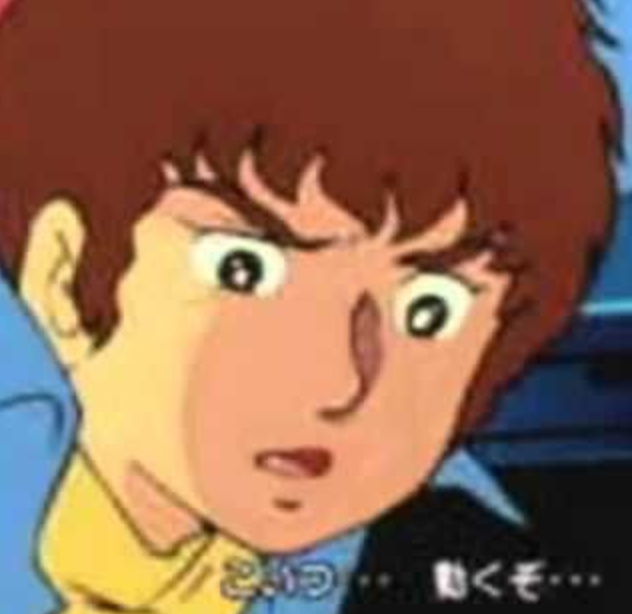

照準が合わないと嘆くアムロ。

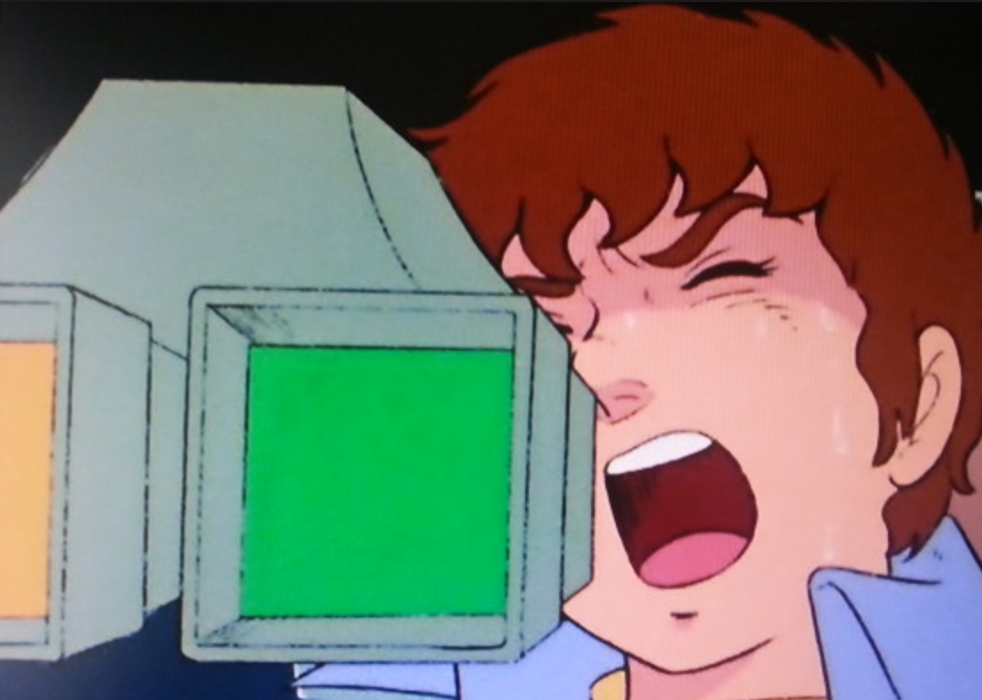

この後アムロは驚異的なスピードで調整する

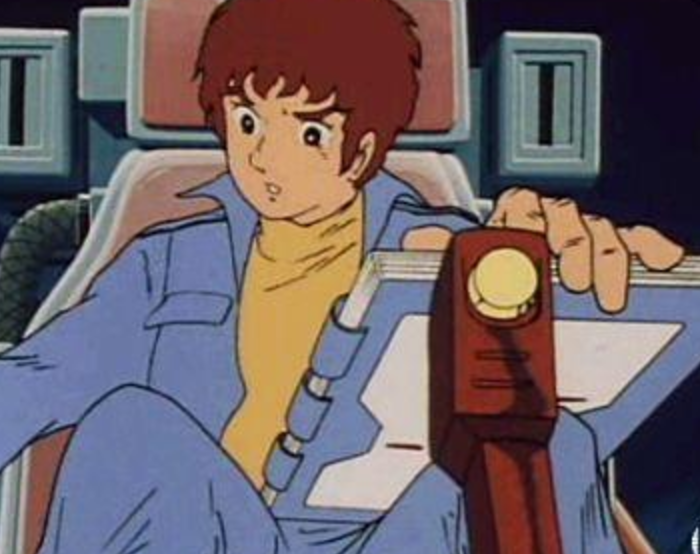

### ユニット数を変えてみる

In [1]:
# ユニット数検証用
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.model_selection import train_test_split

loss_and_metrics_list = []
hidden_unit_list = [10,200,400,800,2000,4000]

def train_model(hidden_len):
    np.random.seed(0)

    '''
    データの生成
    '''
    mnist = datasets.fetch_mldata('MNIST original', data_home='.')

    n = len(mnist.data)
    N = 10000  # MNISTの一部を使う
    indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

    X = mnist.data[indices]
    y = mnist.target[indices]
    Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

    '''
    モデル設定
    '''
    n_in = len(X[0])  # 784
    n_hidden = hidden_len
    n_out = len(Y[0])  # 10

    model = Sequential()
    model.add(Dense(n_hidden, input_dim=n_in))
    model.add(Activation('tanh'))

    model.add(Dense(n_hidden))
    model.add(Activation('tanh'))

    model.add(Dense(n_hidden))
    model.add(Activation('tanh'))

    model.add(Dense(n_hidden))
    model.add(Activation('tanh'))

    model.add(Dense(n_out))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=0.01),
                  metrics=['accuracy'])

    '''
    モデル学習
    '''
    epochs = 100
    batch_size = 200

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)

    '''
    予測精度の評価
    '''
    loss_and_metrics = model.evaluate(X_test, Y_test)
#     print(loss_and_metrics)
    loss_and_metrics_list.append(loss_and_metrics)

    
for hidden_unit in hidden_unit_list:
    train_model(hidden_unit)

print("----------------------------")
print(loss_and_metrics_list)

hidden:[10,200,400,800,2000,4000]

一括で回した：
- [[0.7303638706207275, 0.80649999999999999], [0.28068993407487869, 0.92100000000000004], [0.31312289565801621, 0.90900000000000003], [0.29278449672460555, 0.91549999999999998], [0.27758968764543535, 0.91900000000000004], [0.27249433571100234, 0.92000000000000004]]

別々に実行：
- 0.731564070224762, 0.79700000000000004
- 0.28235714945197105, 0.92100000000000004
- 0.3316758800148964, 0.90349999999999997
- 0.30606450682878494, 0.91600000000000004
- 0.28317108464241025, 0.91849999999999998

- 0.26961222469806673, 0.92200000000000004

10000ユニット　すごい時間かかったが、特に精度がガクッと下がってるわけではない。
- 0.24836750939488411, 0.92949999999999999

本の内容：ユニット数を変えると精度が変わったが単純に増やせばいいといいというわけではない。


### 層の数を変えてみる

In [ ]:
# ユニット数検証用
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.model_selection import train_test_split

loss_and_metrics_list = []
layer_list = [1,2,3,4,5,6]

def train_model(layer):
    np.random.seed(0)

    '''
    データの生成
    '''
    mnist = datasets.fetch_mldata('MNIST original', data_home='.')

    n = len(mnist.data)
    N = 10000  # MNISTの一部を使う
    indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

    X = mnist.data[indices]
    y = mnist.target[indices]
    Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

    '''
    モデル設定
    '''
    n_in = len(X[0])  # 784
    n_hidden = 200
    n_out = len(Y[0])  # 10

    model = Sequential()
    model.add(Dense(n_hidden, input_dim=n_in))
    model.add(Activation('tanh'))
    model.add(Dense(n_hidden))
    model.add(Activation('tanh'))
    
    if layer == 2:
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
    if layer == 3:
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
    if layer == 4:
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
    if layer == 5:
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
    if layer == 6:
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))
        model.add(Dense(n_hidden))
        model.add(Activation('tanh'))

    model.add(Dense(n_out))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=0.01),
                  metrics=['accuracy'])

    '''
    モデル学習
    '''
    epochs = 100
    batch_size = 200

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)

    '''
    予測精度の評価
    '''
    loss_and_metrics = model.evaluate(X_test, Y_test)
#     print(loss_and_metrics)
    loss_and_metrics_list.append(loss_and_metrics)

    
for layer in layer_list:
    train_model(layer)

print("----------------------------")
print(loss_and_metrics_list)

[1,2,3,4,5,6]

[[0.36280465531349182, 0.88949999999999996], [0.3879159264564514, 0.88449999999999995], [0.37437154436111453, 0.88949999999999996], [0.3756986676454544, 0.88300000000000001], [0.36866499519348145, 0.88700000000000001], [0.37636182963848114, 0.88900000000000001]]

本の内容：単純に層を増やすとうまくいくという訳ではない。

実装上のポイント３点<br>
1.shape<br>
2.ndim<br>
3.type<br>
mnistの場合は784になってるが、元の画像は28　× 28に変換したりしてる。<br>
普通の画像であれば256 × 256 × 3 or 4チャンネル<br>
3D CNNの場合はもう1次元増える<br>

## hyperoptコード抜粋

In [2]:
#良いサンプル：https://github.com/Vooban/Hyperopt-Keras-CNN-CIFAR-100/
#横断的にハイパーパラメータを探索する場合に使うライブラリ達

### モデルを定義

In [ ]:
# space = {
#     # This loguniform scale will multiply the learning rate, so as to make
#     # it vary exponentially, in a multiplicative fashion rather than in
#     # a linear fashion, to handle his exponentialy varying nature:
#     'lr_rate_mult': hp.loguniform('lr_rate_mult', -0.5, 0.5),
#     # L2 weight decay:
#     'l2_weight_reg_mult': hp.loguniform('l2_weight_reg_mult', -1.3, 1.3),
#     # Batch size fed for each gradient update
#     'batch_size': hp.quniform('batch_size', 100, 450, 5),
#     # Choice of optimizer:
#     'optimizer': hp.choice('optimizer', ['Adam', 'Nadam', 'RMSprop']),
#     # Coarse labels importance for weights updates:
#     'coarse_labels_weight': hp.uniform('coarse_labels_weight', 0.1, 0.7),
#     # Uniform distribution in finding appropriate dropout values, conv layers
#     'conv_dropout_drop_proba': hp.uniform('conv_dropout_proba', 0.0, 0.35),
#     # Uniform distribution in finding appropriate dropout values, FC layers
#     'fc_dropout_drop_proba': hp.uniform('fc_dropout_proba', 0.0, 0.6),
#     # Use batch normalisation at more places?
#     'use_BN': hp.choice('use_BN', [False, True]),

#     # Use a first convolution which is special?
#     'first_conv': hp.choice(
#         'first_conv', [None, hp.choice('first_conv_size', [3, 4])]
#     ),
#     # Use residual connections? If so, how many more to stack?
#     'residual': hp.choice(
#         'residual', [None, hp.quniform(
#             'residual_units', 1 - 0.499, 4 + 0.499, 1)]
#     ),
#     # Let's multiply the "default" number of hidden units:
#     'conv_hiddn_units_mult': hp.loguniform('conv_hiddn_units_mult', -0.6, 0.6),
#     # Number of conv+pool layers stacked:
#     'nb_conv_pool_layers': hp.choice('nb_conv_pool_layers', [2, 3]),
#     # Starting conv+pool layer for residual connections:
#     'conv_pool_res_start_idx': hp.quniform('conv_pool_res_start_idx', 0, 2, 1),
#     # The type of pooling used at each subsampling step:
#     'pooling_type': hp.choice('pooling_type', [
#         'max',  # Max pooling
#         'avg',  # Average pooling
#         'all_conv',  # All-convolutionnal: https://arxiv.org/pdf/1412.6806.pdf
#         'inception'  # Inspired from: https://arxiv.org/pdf/1602.07261.pdf
#     ]),
#     # The kernel_size for convolutions:
#     'conv_kernel_size': hp.quniform('conv_kernel_size', 2, 4, 1),
#     # The kernel_size for residual convolutions:
#     'res_conv_kernel_size': hp.quniform('res_conv_kernel_size', 2, 4, 1),

#     # Amount of fully-connected units after convolution feature map
#     'fc_units_1_mult': hp.loguniform('fc_units_1_mult', -0.6, 0.6),
#     # Use one more FC layer at output
#     'one_more_fc': hp.choice(
#         'one_more_fc', [None, hp.loguniform('fc_units_2_mult', -0.6, 0.6)]
#     ),
#     # Activations that are used everywhere
#     'activation': hp.choice('activation', ['relu', 'elu'])
# }



### 実行

In [ ]:
# best = fmin(
#         optimize_cnn,
#         space,
#         algo=tpe.suggest,
#         trials=trials,
#         max_evals=max_evals
#     )

In [ ]:
# def optimize_cnn(hype_space):
#     """Build a convolutional neural network and train it."""
#     try:
#         model, model_name, result, _ = build_and_train(hype_space)

#         # Save training results to disks with unique filenames
#         save_json_result(model_name, result)

#         K.clear_session()
#         del model

#         return result

In [ ]:
# def build_and_train(hype_space, save_best_weights=False, log_for_tensorboard=False):
#     model, model_name, result, _ = build_and_train(hype_space)


# def build_model(hype_space):
#     input_layer = keras.layers.Input(
#         (IMAGE_BORDER_LENGTH, IMAGE_BORDER_LENGTH, NB_CHANNELS))

#     current_layer = random_image_mirror_left_right(input_layer)

#     if hype_space['first_conv'] is not None:
#         k = hype_space['first_conv']
#         current_layer = keras.layers.convolutional.Conv2D(
#             filters=16, kernel_size=(k, k), strides=(1, 1),
#             padding='same', activation=hype_space['activation'],
#             kernel_regularizer=keras.regularizers.l2(
#                 STARTING_L2_REG * hype_space['l2_weight_reg_mult'])
#         )(current_layer)

#     # Core loop that stacks multiple conv+pool layers, with maybe some
#     # residual connections and other fluffs:
#     n_filters = int(40 * hype_space['conv_hiddn_units_mult'])
#     for i in range(hype_space['nb_conv_pool_layers']):
#         print(i)
#         print(n_filters)
#         print(current_layer._keras_shape)

#         current_layer = convolution(current_layer, n_filters, hype_space)
#         if hype_space['use_BN']:
#             current_layer = bn(current_layer)
#         print(current_layer._keras_shape)

#         deep_enough_for_res = hype_space['conv_pool_res_start_idx']
#         if i >= deep_enough_for_res and hype_space['residual'] is not None:
#             current_layer = residual(current_layer, n_filters, hype_space)
#             print(current_layer._keras_shape)

#         current_layer = auto_choose_pooling(
#             current_layer, n_filters, hype_space)
#         print(current_layer._keras_shape)

#         current_layer = dropout(current_layer, hype_space)

#         n_filters *= 2

#     # Fully Connected (FC) part:
#     current_layer = keras.layers.core.Flatten()(current_layer)
#     print(current_layer._keras_shape)

#     current_layer = keras.layers.core.Dense(
#         units=int(1000 * hype_space['fc_units_1_mult']),
#         activation=hype_space['activation'],
#         kernel_regularizer=keras.regularizers.l2(
#             STARTING_L2_REG * hype_space['l2_weight_reg_mult'])
#     )(current_layer)
#     print(current_layer._keras_shape)

#     current_layer = dropout(
#         current_layer, hype_space, for_convolution_else_fc=False)

#     if hype_space['one_more_fc'] is not None:
#         current_layer = keras.layers.core.Dense(
#             units=int(750 * hype_space['one_more_fc']),
#             activation=hype_space['activation'],
#             kernel_regularizer=keras.regularizers.l2(
#                 STARTING_L2_REG * hype_space['l2_weight_reg_mult'])
#         )(current_layer)
#         print(current_layer._keras_shape)

#         current_layer = dropout(
#             current_layer, hype_space, for_convolution_else_fc=False)

#     # Two heads as outputs:
#     fine_outputs = keras.layers.core.Dense(
#         units=NB_CLASSES_FINE,
#         activation="sigmoid",
#         kernel_regularizer=keras.regularizers.l2(
#             STARTING_L2_REG * hype_space['l2_weight_reg_mult']),
#         name='fine_outputs'
#     )(current_layer)

#     coarse_outputs = keras.layers.core.Dense(
#         units=NB_CLASSES_COARSE,
#         activation="sigmoid",
#         kernel_regularizer=keras.regularizers.l2(
#             STARTING_L2_REG * hype_space['l2_weight_reg_mult']),
#         name='coarse_outputs'
#     )(current_layer)

#     # Finalize model:
#     model = keras.models.Model(
#         inputs=[input_layer],
#         outputs=[fine_outputs, coarse_outputs]
#     )
#     model.compile(
#         optimizer=OPTIMIZER_STR_TO_CLASS[hype_space['optimizer']](
#             lr=0.001 * hype_space['lr_rate_mult']
#         ),
#         loss='categorical_crossentropy',
#         loss_weights=[1.0, hype_space['coarse_labels_weight']],
#         metrics=['accuracy']
#     )
#     return model


# # Train net:
#     history = model.fit(
#         [x_train],
#         [y_train, y_train_c],
#         batch_size=int(hype_space['batch_size']),
#         epochs=EPOCHS,
#         shuffle=True,
#         verbose=1,
#         callbacks=callbacks,
#         validation_data=([x_test], [y_test, y_test_coarse])
#     ).history

## 4.2 学習における問題

### 4.2.1 勾配喪失問題

シグモイド関数の微分はx=0の時に0.25の値になる。<br>
xの値が0に近い値で層が重なると極端に値が変化する。<br>
1層：0.25<br>
2層：0.25*0.25=0.0625<br>
3層：0.015625<br>
4層：0.00390625<br>

Output After Training:
(4, 1)


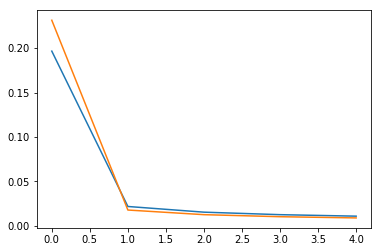

In [17]:
#2層ニューラルネットワーク
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

grad1_list = []
grad2_list = []
l1_error_list = []

# シグモイド 関数
def nonlin(x,deriv=False):
    if(deriv==True): #backprop用
        return x*(1-x) #微分したシグモイド　http://nonbiri-tereka.hatenablog.com/entry/2014/06/30/134023
    return 1/(1+np.exp(-x)) 
    
#学習データ　３行データが４つ。
X = np.array([[0,0,1], [0,1,1],[1,0,1],[1,1,1]])
    
# 出力(正解ラベル)データ  
y = np.array([[0,0,1,1]]).T

#重み初期化
np.random.seed(1)
W0 = 2*np.random.random((3,1)) - 1

for iter in range(10000):
    # 順伝搬
    l0 = X
    l1 = nonlin(np.dot(l0,W0))
    if (iter% 2000) == 0:
#         print("grad ", nonlin(l1,True))
        grad1_list.append(nonlin(l1,True)[0][0])
        grad2_list.append(nonlin(l1,True)[1][0])
    #誤差
    l1_error = y - l1
    if (iter% 2000) == 0:
#         print("loss ", str(l1_error))
        l1_error_list.append(l1_error)
    
    # エラー値とl1の傾きをかける。l1_deltaは更新量
    l1_delta = l1_error * nonlin(l1,True)
#     print(l1_delta)
    # 重み更新
    W0 += np.dot(l0.T,l1_delta)
#     print(W0)
print("Output After Training:")

# print(grad1_list.shape)
# print(grad2_list.shape)
print(l1_error_list[0].shape)
plt.plot(grad1_list)
plt.plot(grad2_list)

Error:0.496410031903


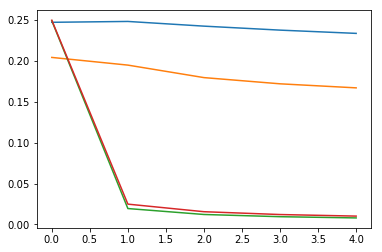

In [5]:
#3層ニューラルネットワーク
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

grad1_list = []
grad2_list = []
grad1_list2 = []
grad2_list2 = []

# シグモイド 関数
def nonlin(x,deriv=False):
    if(deriv==True): #backprop用
        return x*(1-x) #微分したシグモイド　http://nonbiri-tereka.hatenablog.com/entry/2014/06/30/134023
    return 1/(1+np.exp(-x)) 
    
#学習データ　３行データが４つ。
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])    
# 出力(正解ラベル)データ  
y = np.array([[0],[1],[1],[0]])

#重み初期化
np.random.seed(1)
W0 = 2*np.random.random((3,4)) - 1
W1 = 2*np.random.random((4,1)) - 1

for iter in range(10000):
    # 順伝搬
    l0 = X
    l1 = nonlin(np.dot(l0,W0))
    l2 = nonlin(np.dot(l1,W1))

    l2_error = y - l2
    if (iter% 10000) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
    
    l2_delta = l2_error*nonlin(l2,deriv=True)
    l1_error = l2_delta.dot(W1.T)
    l1_delta = l1_error * nonlin(l1,deriv=True)
    if (iter% 2000) == 0:
        grad1_list.append(nonlin(l1,True)[0][0])
        grad2_list.append(nonlin(l1,True)[1][0])
        grad1_list2.append(nonlin(l2,True)[0][0])
        grad2_list2.append(nonlin(l2,True)[1][0])
        
    W1 += l1.T.dot(l2_delta)
    W0 += l0.T.dot(l1_delta)


plt.plot(grad1_list)
plt.plot(grad2_list)

plt.plot(grad1_list2)
plt.plot(grad2_list2)


中間層の更新がされにくくなってる。

## 課題1：４層ネットワークを書いてみよう
## 課題2：４層ネットワークをkerasかtensorflowで書いてみよう

Error:0.500300148398


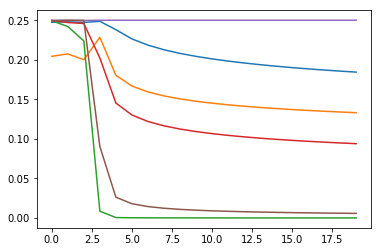

In [65]:
#4層ニューラルネットワーク
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

grad1_list = []
grad2_list = []
grad1_list2 = []
grad2_list2 = []
grad1_list3 = []
grad2_list3 = []


# シグモイド 関数
def nonlin(x,deriv=False):
    if(deriv==True): #backprop用
        return x*(1-x) #微分したシグモイド　http://nonbiri-tereka.hatenablog.com/entry/2014/06/30/134023
    return 1/(1+np.exp(-x)) 
    
#学習データ　３行データが４つ。
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])    
# 出力(正解ラベル)データ  
y = np.array([[0],[1],[1],[0]])

#重み初期化
np.random.seed(1)
W0 = 2*np.random.random((3,4)) - 1
W1 = 2*np.random.random((4,1)) - 1
W2 = 2*np.random.random((1,4)) - 1

for iter in range(10000):
    # 順伝搬
    l0 = X
    l1 = nonlin(np.dot(l0,W0))
    l2 = nonlin(np.dot(l1,W1))
#     print(l2.shape)
#     print(W2.shape)
    l3 = nonlin(np.dot(l2,W2))

    l3_error = y - l3
    if (iter% 10000) == 0:
        print("Error:" + str(np.mean(np.abs(l3_error))))
    
    l3_delta = l3_error*nonlin(l3,deriv=True)
    l2_error = l3_delta.dot(W2.T)
    l2_delta = l2_error*nonlin(l2,deriv=True)
    l1_error = l2_delta.dot(W1.T)
    l1_delta = l1_error * nonlin(l1,deriv=True)
    if (iter% 500) == 0:
        grad1_list.append(nonlin(l1,True)[0][0])
        grad2_list.append(nonlin(l1,True)[1][0])
        grad1_list2.append(nonlin(l2,True)[0][0])
        grad2_list2.append(nonlin(l2,True)[1][0])
        grad1_list3.append(nonlin(l3,True)[0][0])
        grad2_list3.append(nonlin(l3,True)[1][0])
    
    W2 += l2.T.dot(l3_delta)
    W1 += l1.T.dot(l2_delta)
    W0 += l0.T.dot(l1_delta)


plt.plot(grad1_list)
plt.plot(grad2_list)

plt.plot(grad1_list2)
plt.plot(grad2_list2)

plt.plot(grad1_list3)
plt.plot(grad2_list3)


Error:0.499991557111


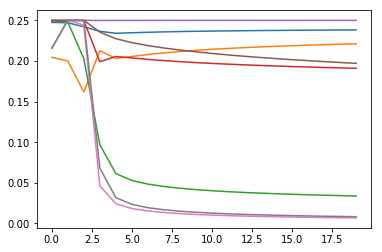

In [66]:
#5層ニューラルネットワーク
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

grad1_list = []
grad2_list = []
grad1_list2 = []
grad2_list2 = []
grad1_list3 = []
grad2_list3 = []
grad1_list4 = []
grad2_list4 = []


# シグモイド 関数
def nonlin(x,deriv=False):
    if(deriv==True): #backprop用
        return x*(1-x) #微分したシグモイド　http://nonbiri-tereka.hatenablog.com/entry/2014/06/30/134023
    return 1/(1+np.exp(-x)) 
    
#学習データ　３行データが４つ。
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])    
# 出力(正解ラベル)データ  
y = np.array([[0],[1],[1],[0]])

#重み初期化
np.random.seed(1)
W0 = 2*np.random.random((3,4)) - 1
W1 = 2*np.random.random((4,1)) - 1
W2 = 2*np.random.random((1,4)) - 1
W3 = 2*np.random.random((4,1)) - 1

for iter in range(10000):
    # 順伝搬
    l0 = X
    l1 = nonlin(np.dot(l0,W0))
    l2 = nonlin(np.dot(l1,W1))
    l3 = nonlin(np.dot(l2,W2))
    l4 = nonlin(np.dot(l3,W3))

    l4_error = y - l4
    if (iter% 10000) == 0:
        print("Error:" + str(np.mean(np.abs(l4_error))))

    l4_delta = l4_error*nonlin(l4,deriv=True)
    l3_error = l4_delta.dot(W3.T)
    l3_delta = l3_error*nonlin(l3,deriv=True)
    l2_error = l3_delta.dot(W2.T)
    l2_delta = l2_error*nonlin(l2,deriv=True)
    l1_error = l2_delta.dot(W1.T)
    l1_delta = l1_error * nonlin(l1,deriv=True)
    if (iter% 500) == 0:
        grad1_list.append(nonlin(l1,True)[0][0])
        grad2_list.append(nonlin(l1,True)[1][0])
        grad1_list2.append(nonlin(l2,True)[0][0])
        grad2_list2.append(nonlin(l2,True)[1][0])
        grad1_list3.append(nonlin(l3,True)[0][0])
        grad2_list3.append(nonlin(l3,True)[1][0])
        grad1_list4.append(nonlin(l4,True)[0][0])
        grad2_list4.append(nonlin(l4,True)[1][0])

    W3 += l3.T.dot(l4_delta)
    W2 += l2.T.dot(l3_delta)
    W1 += l1.T.dot(l2_delta)
    W0 += l0.T.dot(l1_delta)


plt.plot(grad1_list)
plt.plot(grad2_list)

plt.plot(grad1_list2)
plt.plot(grad2_list2)

plt.plot(grad1_list3)
plt.plot(grad2_list3)

plt.plot(grad1_list4)
plt.plot(grad2_list4)


### 4.2.2 オーバーフィッティング問題

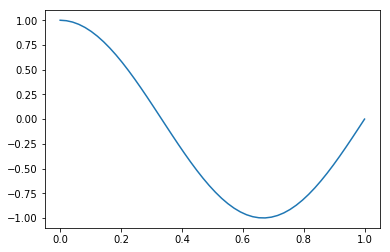

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 1)
# print(x)
# print(np.cos((3*np.pi/2)*x))
plt.plot(x, np.cos((3*np.pi/2)*x)) #真の分布

50
0.0204081632653 0.995379112949


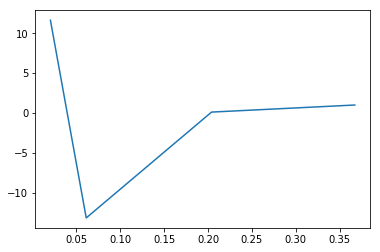

In [35]:
x = np.linspace(0, 1)
print(len(x))
a1 = x[1]
b1 = np.cos((3*np.pi/2)*x)[1]
a2 = x[3]
b2 = np.cos((3*np.pi/2)*x)[3]
a3 = x[10]
b3 = np.cos((3*np.pi/2)*x)[10]
a4 = x[18]
b4 = np.cos((3*np.pi/2)*x)[18]
a5 = x[26]
b5 = np.cos((3*np.pi/2)*x)[26]
a6 = x[32]
b6 = np.cos((3*np.pi/2)*x)[32]
a7 = x[42]
b7 = np.cos((3*np.pi/2)*x)[42]
a8 = x[46]
b8 = np.cos((3*np.pi/2)*x)[46]
print(a1, b1)
x1 = np.array([a1,a2,a3,a4])
y1 = np.array([b1,b2,b3,b4])
z1 = np.polyfit(x1, y1, 3)
plt.plot(x1, z1) #三次式

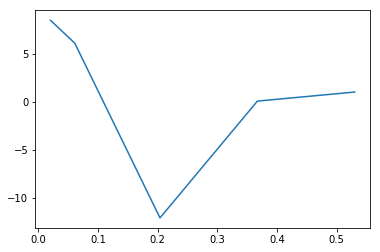

In [39]:
x1 = np.array([a1,a2,a3,a4,a5])
y1 = np.array([b1,b2,b3,b4,b5])
z1 = np.polyfit(x1, y1, 4)
plt.plot(x1, z1) #4次式

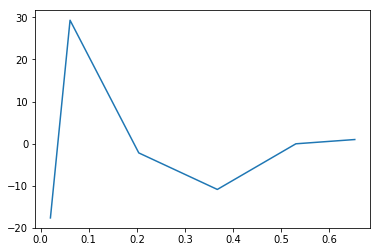

In [41]:
x1 = np.array([a1,a2,a3,a4,a5,a6])
y1 = np.array([b1,b2,b3,b4,b5,b6])
z1 = np.polyfit(x1, y1, 5)
plt.plot(x1, z1) #5次式

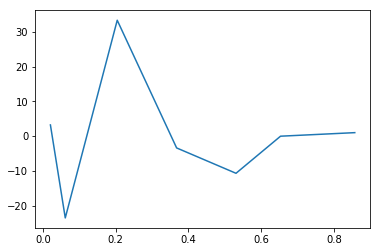

In [42]:
x1 = np.array([a1,a2,a3,a4,a5,a6,a7])
y1 = np.array([b1,b2,b3,b4,b5,b6,b7])
z1 = np.polyfit(x1, y1, 6)
plt.plot(x1, z1) #6次式

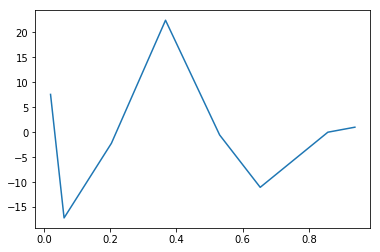

In [43]:
x1 = np.array([a1,a2,a3,a4,a5,a6,a7,a8])
y1 = np.array([b1,b2,b3,b4,b5,b6,b7,b8])
z1 = np.polyfit(x1, y1, 7)
plt.plot(x1, z1) #7次式

7次式より4次式の方が分布が似てる。

本の内容：サンプルデータのみに過剰に近似しない様に注意しよう。


## 4.3 学習の効率化

### 4.3.1 活性化関数

ハイパボリックタンジェント

(-1.2, 1.2)

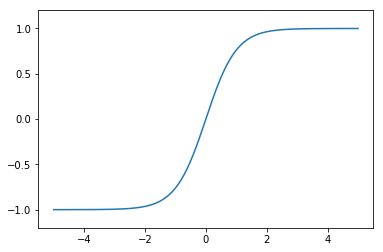

In [51]:
import tensorflow as tf
x = np.linspace(-5, 5, 200)
y_tanh = tf.nn.tanh(x)
sess = tf.Session()
y_tanh = sess.run(y_tanh)
plt.plot(x, y_tanh, label='tanh')
plt.ylim((-1.2, 1.2))

(-0.2, 1.2)

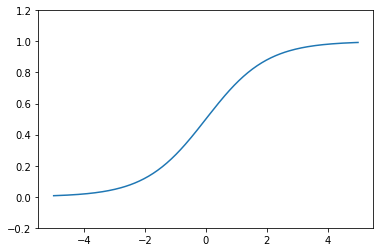

In [53]:
import tensorflow as tf
x = np.linspace(-5, 5, 200)
y_tanh = tf.nn.sigmoid(x)
sess = tf.Session()
y_tanh = sess.run(y_tanh)
plt.plot(x, y_tanh, label='sigmoid')
plt.ylim((-0.2, 1.2))

(-1, 5)

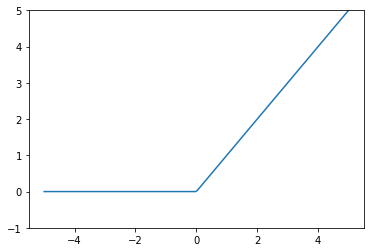

In [54]:
import tensorflow as tf
x = np.linspace(-5, 5, 200)
y_tanh = tf.nn.relu(x)
sess = tf.Session()
y_tanh = sess.run(y_tanh)
plt.plot(x, y_tanh, label='relu')
plt.ylim((-1, 5))

In [67]:
################
# tf.maximum
################
x = tf.constant([[2, 8], [3, 12]])
y = tf.constant([[4, 10], [1, 9]])
tf_maximum = tf.maximum(x, y)
print(sess.run(tf_maximum))

[[ 4 10]
 [ 3 12]]


(-1, 5)

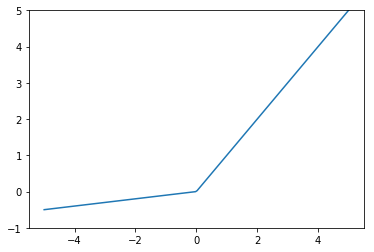

In [63]:
import tensorflow as tf
x = np.linspace(-5, 5, 200)
def lrelu(x, alpha):
#     return tf.nn.relu(x) - alpha * tf.nn.relu(-x)
    return tf.maximum(alpha * x, x)
y_tanh = lrelu(x, 0.1)
sess = tf.Session()
y_tanh = sess.run(y_tanh)
plt.plot(x, y_tanh, label='lrelu')
plt.ylim((-1, 5))

(-0.2, 6)

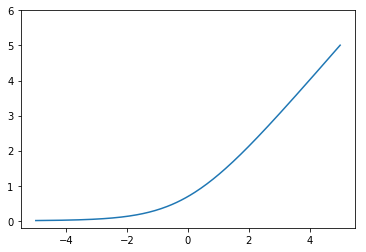

In [55]:
import tensorflow as tf
x = np.linspace(-5, 5, 200)
y_tanh = tf.nn.softplus(x)
sess = tf.Session()
y_tanh = sess.run(y_tanh)
plt.plot(x, y_tanh, label='softplus')
plt.ylim((-0.2, 6))

### 4.3.2 ドロップアウト

ランダムにユニットの計算をしない。

本の内容：ドロップアウトは擬似的にアンサンブル学習をしている。

### kerasでドロップアウト！！！

In [ ]:

import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(0)

'''
データの生成
'''
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # MNISTの一部を使う
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

'''
モデル設定
'''
n_in = len(X[0])  # 784
n_hidden = 200
n_out = len(Y[0])  # 10

model = Sequential()
model.add(Dense(n_hidden, input_dim=n_in))
model.add(Activation('tanh'))
model.add(Dropout(0.5)) #drop out

model.add(Dense(n_hidden))
model.add(Activation('tanh'))
model.add(Dropout(0.5)) #drop out

model.add(Dense(n_hidden))
model.add(Activation('tanh'))
model.add(Dropout(0.5)) #drop out

model.add(Dense(n_out))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

'''
モデル学習
'''
epochs = 150
batch_size = 200

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)

'''
予測精度の評価
'''
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

### tensorflowでドロップアウト！！！

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)
tf.set_random_seed(1234)

'''
データの生成
'''
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # MNISTの一部を使う
train_size = 0.8
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

X_train, X_test, Y_train, Y_test =\
    train_test_split(X, Y, train_size=train_size)

'''
モデル設定
'''
n_in = len(X[0])  # 784
n_hidden = 200
n_out = len(Y[0])  # 10

x = tf.placeholder(tf.float32, shape=[None, n_in])
t = tf.placeholder(tf.float32, shape=[None, n_out])
keep_prob = tf.placeholder(tf.float32)  # ドロップアウトしない確率

# 入力層 - 隠れ層
W0 = tf.Variable(tf.truncated_normal([n_in, n_hidden], stddev=0.01))
b0 = tf.Variable(tf.zeros([n_hidden]))
h0 = tf.nn.relu(tf.matmul(x, W0) + b0)
h0_drop = tf.nn.dropout(h0, keep_prob) #drop out

# 隠れ層 - 隠れ層
W1 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.01))
b1 = tf.Variable(tf.zeros([n_hidden]))
h1 = tf.nn.relu(tf.matmul(h0_drop, W1) + b1)
h1_drop = tf.nn.dropout(h1, keep_prob) #drop out

W2 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.01))
b2 = tf.Variable(tf.zeros([n_hidden]))
h2 = tf.nn.relu(tf.matmul(h1_drop, W2) + b2)
h2_drop = tf.nn.dropout(h2, keep_prob) #drop out

# 隠れ層 - 出力層
W3 = tf.Variable(tf.truncated_normal([n_hidden, n_out], stddev=0.01))
b3 = tf.Variable(tf.zeros([n_out]))
y = tf.nn.softmax(tf.matmul(h2_drop, W3) + b3)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y),
                               reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

'''
モデル学習
'''
epochs = 30
batch_size = 200

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

n_batches = (int)(N * train_size) // batch_size

for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end],
            keep_prob: 0.5
        })

    # 訓練データに対する学習の進み具合を出力
    loss = cross_entropy.eval(session=sess, feed_dict={
        x: X_,
        t: Y_,
        keep_prob: 1.0
    })
    acc = accuracy.eval(session=sess, feed_dict={
        x: X_,
        t: Y_,
        keep_prob: 1.0
    })
    print('epoch:', epoch, ' loss:', loss, ' accuracy:', acc)

'''
予測精度の評価
'''
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test,
    keep_prob: 1.0
})
print('accuracy: ', accuracy_rate)

# ゼロから作る本より最適化関数

## 適当なデータで２層ネットワークを試す

train acc, test acc | 0.0, 0.0
train acc, test acc | 0.0, 0.0
train acc, test acc | 0.0, 0.0
train acc, test acc | 0.0, 0.0
train acc, test acc | 0.0, 0.0


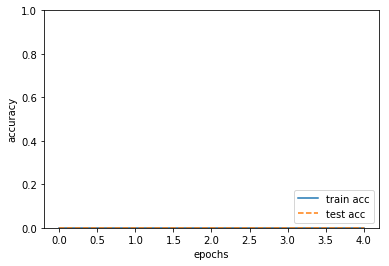

In [36]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
# データの読み込み

x_train = np.ones((100,784), dtype = int)
x_test = np.ones((100,784), dtype = int)
t_train = np.ones((100,1), dtype = int)
t_test = np.ones((100,1), dtype = int)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 100  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 5
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## データをmnistへ

### SGD

特性：鞍点に陥る場合がある。学習率一定なので、一定の収束時間がかかる。

In [ ]:
#chainerコード
#https://github.com/chainer/chainer/blob/0aa511a748381d2ff07fa5a2f718f3d865061677/chainer/optimizers/sgd.py#L33
#     def update_core_cpu(self, param):
#         grad = param.grad
#         if grad is None:
#             return
#         param.data -= self.hyperparam.lr * grad

train acc, test acc | 0.1185, 0.1135


/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


train acc, test acc | 0.703125, 0.6895
train acc, test acc | 0.778875, 0.7625
train acc, test acc | 0.784875, 0.7685
train acc, test acc | 0.794375, 0.7915
train acc, test acc | 0.781875, 0.783
train acc, test acc | 0.779875, 0.781


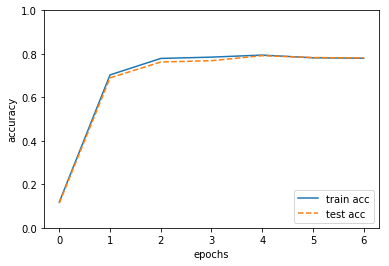

In [41]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
# データの読み込み
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # MNISTの一部を使う
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

x_train, x_test, t_train, t_test = train_test_split(X, Y, train_size=0.8)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 1000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 50
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## Momentum SGD

学習率は固定でモメンタム項によりパラメータの更新値を調整。

特性：勾配がきついなら多めに更新するし、ゆるいなら少なめに更新する。

In [ ]:
#cahiner
#https://github.com/chainer/chainer/blob/0aa511a748381d2ff07fa5a2f718f3d865061677/chainer/optimizers/momentum_sgd.py#L38
#     def update_core_cpu(self, param):
#         grad = param.grad
#         if grad is None:
#             return
#         v = self.state['v']
#         v = v * self.hyperparam.momentum
#         v = v - (self.hyperparam.lr * grad)
#         param.data += v

train acc, test acc | 0.171125, 0.158


/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


train acc, test acc | 0.727, 0.7245
train acc, test acc | 0.77675, 0.763
train acc, test acc | 0.795625, 0.8
train acc, test acc | 0.783125, 0.7705
train acc, test acc | 0.773, 0.7505
train acc, test acc | 0.80175, 0.785


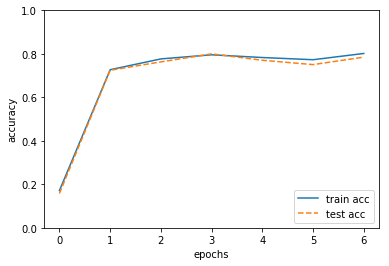

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
# データの読み込み
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # MNISTの一部を使う
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

x_train, x_test, t_train, t_test = train_test_split(X, Y, train_size=0.8)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 1000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 50
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    momentum = 0.9
    v = {}
    for key, val in network.params.items():
        v[key] = np.zeros_like(val)
    for key in network.params.keys():
#         print(key)
#         print("v[key] ", len(v[key]))
        v[key] = momentum*v[key] - learning_rate*grad[key] 
        network.params[key] += v[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### Adagrad

学習率そのものを更新する。


特性：だんだん学習率が減っていく。稀なパラメータには大きく更新し、頻出するパラメータは小さく更新する。スパースデータに強い。

In [ ]:
#chainr
#https://github.com/chainer/chainer/blob/0aa511a748381d2ff07fa5a2f718f3d865061677/chainer/optimizers/ada_grad.py#L40
#     def update_core_cpu(self, param):
#         grad = param.grad
#         if grad is None:
#             return

#         lr = self.hyperparam.lr
#         eps = self.hyperparam.eps
#         h = self.state['h']

#         h += grad * grad
#         param.data -= lr * grad / (numpy.sqrt(h) + eps)

train acc, test acc | 0.11225, 0.103


/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


train acc, test acc | 0.8095, 0.803
train acc, test acc | 0.83875, 0.826
train acc, test acc | 0.851375, 0.8335
train acc, test acc | 0.859, 0.8465
train acc, test acc | 0.856625, 0.839
train acc, test acc | 0.87175, 0.858


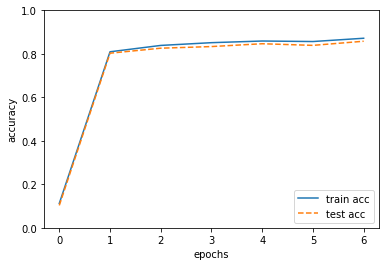

In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
# データの読み込み
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # MNISTの一部を使う
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

x_train, x_test, t_train, t_test = train_test_split(X, Y, train_size=0.8)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 1000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 50
learning_rate = 0.008

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    h = {}
    for key, val in network.params.items():
        h[key] = np.zeros_like(val)
    for key in network.params.keys():
        h[key] += grad[key] * grad[key] #過去の勾配情報を対角行列で保持
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### Adadelta

Adagradの発展形で、急速かつ単調な学習率の低下を防ぐ手段を探る。過去の勾配を蓄積する領域を、ある定数wに制限。

特徴：Adagradの勾配にかかる係数が急激に小さくなって、学習が進まなくなる問題を解決する手法。

In [ ]:
#chainr
#r/chainer/blob/0aa511a748381d2ff07fa5a2f718f3d865061677/chainer/optimizers/ada_delta.py#L42
#     def update_core_cpu(self, param):
#         grad = param.grad
#         if grad is None:
#             return
#         msg, msdx = self.state['msg'], self.state['msdx']
#         rho = self.hyperparam.rho
#         eps = self.hyperparam.eps

#         msg *= rho
#         msg += (1 - rho) * grad * grad #過去の勾配情報を蓄える
#         dx = numpy.sqrt((msdx + eps) / (msg + eps)) * grad
#         msdx *= rho
#         msdx += (1 - rho) * dx * dx
#         param.data -= dx

In [ ]:
#todo

### RMSProp

adadelta同様にadagradにおける学習率の急激な現象の問題を解決する手法。

In [ ]:
#chainer
#https://github.com/chainer/chainer/blob/0aa511a748381d2ff07fa5a2f718f3d865061677/chainer/optimizers/rmsprop.py#L44
#     def update_core_cpu(self, param):
#         grad = param.grad
#         if grad is None:
#             return
#         hp = self.hyperparam
#         ms = self.state['ms']

#         ms *= hp.alpha
#         ms += (1 - hp.alpha) * grad * grad 
#         param.data -= hp.lr * grad / (numpy.sqrt(ms) + hp.eps)

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


train acc, test acc | 0.117875, 0.1235
train acc, test acc | 0.45, 0.4375
train acc, test acc | 0.486625, 0.4955
train acc, test acc | 0.528375, 0.535
train acc, test acc | 0.57525, 0.576
train acc, test acc | 0.570375, 0.5865
train acc, test acc | 0.66475, 0.645


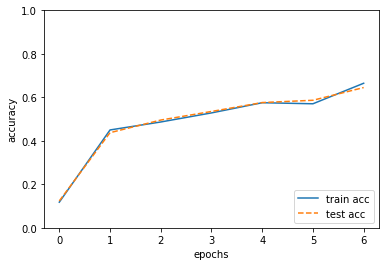

In [50]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
# データの読み込み
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # MNISTの一部を使う
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

x_train, x_test, t_train, t_test = train_test_split(X, Y, train_size=0.8)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 1000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 50
learning_rate = 0.008

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    decay_rate = 0.99
    h = {}
    for key, val in network.params.items():
        h[key] = np.zeros_like(val)
    for key in network.params.keys():
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * grad[key] * grad[key]
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### Adam

過去の勾配の二乗vtの指数関数的減衰平均に加え、過去の勾配mtの指数関数的減数平均を保持。

In [ ]:
#chainer
#https://github.com/chainer/chainer/blob/0aa511a748381d2ff07fa5a2f718f3d865061677/chainer/optimizers/adam.py#L52
#     def update_core_cpu(self, param):
#         grad = param.grad
#         if grad is None:
#             return
#         hp = self.hyperparam
#         m, v = self.state['m'], self.state['v']

#         m += (1 - hp.beta1) * (grad - m)
#         v += (1 - hp.beta2) * (grad * grad - v)
#         param.data -= self.lr * m / (numpy.sqrt(v) + hp.eps)

In [53]:
#todo

## Dropout

In [55]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def dropout_forward(mask, train_flg=True):
    dropout_ratio=0.5
    if train_flg:
        mask = np.random.rand(*x.shape) > dropout_ratio
        return x * mask
    else:
        return x * (1.0 - dropout_ratio)

def dropout_backward(mask, dout):
    return dout * mask

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.mask = None #ドロップアウト用
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        


        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        z1 = dropout_forward(z1) #エラーダァー
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
#         dropout_backward
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
    
# データの読み込み
mnist = datasets.fetch_mldata('MNIST original', data_home='.')

n = len(mnist.data)
N = 10000  # MNISTの一部を使う
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]  # 1-of-K 表現に変換

x_train, x_test, t_train, t_test = train_test_split(X, Y, train_size=0.8)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 1000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 50
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


ValueError: shapes (7,) and (50,10) not aligned: 7 (dim 0) != 50 (dim 0)

# エラー中

In [45]:
#2層ニューラルネットワーク
# シグモイド 関数
def nonlin(x,deriv=False):
    if(deriv==True): #backprop用
        return x*(1-x) #微分したシグモイド　http://nonbiri-tereka.hatenablog.com/entry/2014/06/30/134023
    return 1/(1+np.exp(-x)) 
    
#学習データ　３行データが４つ。
X = np.array([[0,0,1], [0,1,1],[1,0,1],[1,1,1]])
    
# 出力(正解ラベル)データ  
y = np.array([[0,0,1,1]]).T

#重み初期化
np.random.seed(1)
W0 = 2*np.random.random((3,1)) - 1

for iter in range(10000):
    # 順伝搬
    l0 = X
    l1 = nonlin(np.dot(l0,W0))
    if (iter% 2000) == 0:
        print("l1 ", l1)
    #誤差
    l1_error = y - l1
    if (iter% 2000) == 0:
        print("loss ", str(l1_error))

    # エラー値とl1の傾きをかける。l1_deltaは更新量
    gamma = .9
    v = {}
    v["W0"] = np.zeros_like(W0)
    v["W0"] = momentum*v["W0"] - learning_rate*nonlin(l1,True)
    W0 += v["W0"]
    
print("Output After Training:")
print(l1)


l1  [[ 0.2689864 ]
 [ 0.36375058]
 [ 0.23762817]
 [ 0.3262757 ]]
loss  [[-0.2689864 ]
 [-0.36375058]
 [ 0.76237183]
 [ 0.6737243 ]]


ValueError: operands could not be broadcast together with shapes (3,1) (4,1) 